In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import matplotlib.colors as colors
from matplotlib import offsetbox
from sklearn import preprocessing
from sklearn import manifold
%matplotlib inline

Récupérer les données "Faces" depuis la page http://isomap.stanford.edu/datasets.html. Il s'agit de données au format matlab. Ces données peuvent être chargées sous Python grâce au module scipy.io.

In [3]:
Faces = scipy.io.loadmat('/Users/bmichel/Dropbox/Enseignements/ADD-M2Stat/Tps-Notebooks/Datasets/Faces/face_data.mat')

In [4]:
Faces

{'__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file, Platform: LNX86, Created on: Thu Dec 21 04:26:42 2000',
 '__version__': '1.0',
 'image_pcs': array([[  0.04525487,   0.13018455,  -0.03651345, ...,   0.0231279 ,
           0.2820296 ,  -0.04782509],
        [ -0.1970836 ,  -0.03475046,   0.15757234, ...,   0.03219018,
           0.12055105,  -0.062985  ],
        [  0.16881233,   0.05006466,  -0.04231458, ...,  -0.0265296 ,
          -0.06459657,   0.1445865 ],
        ..., 
        [ -5.59778375,   7.36170063,  -5.347948  , ...,   2.95548703,
           0.24451317,  -8.17805522],
        [  2.79708829,   2.25572856,   2.88517427, ...,   1.61808089,
         -13.59660852,  -4.22813798],
        [ -4.93951831,   2.2062301 ,  -6.87730034, ...,  12.2266793 ,
          -0.92971935,   5.87361533]]),
 'images': array([[ 0.01617647,  0.01617647,  0.01617647, ...,  0.01617647,
          0.01617647,  0.01617647],
        [ 0.01617647,  0.01617647,  0.01617647, ...,  0.01617647,
         

Nous obtenons un dict :

In [5]:
type(Faces)

dict

In [6]:
poses = Faces['poses']
lights = Faces['lights']

Attentions, pour retrouver une image il faut redimensionner chaque vecteur sous la forme d'un tableau 64x64. Par ailleurs les images sont en "négatif" et sous forme transposée.

In [7]:
images  = Faces['images']
im  = images[:,0] #  c'est un objet 1 dimenssionel
im.reshape(64,64) #  pour avoir le bon format de l'image 64 x 64 

array([[ 0.01617647,  0.01617647,  0.01617647, ...,  0.01617647,
         0.01617647,  0.01617647],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ..., 
       [ 0.38419118,  0.59010417,  0.56280637, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.12766544,  0.425     ,  0.57501532, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.00862439,  0.12411152,  0.32196691, ...,  0.        ,
         0.        ,  0.        ]])

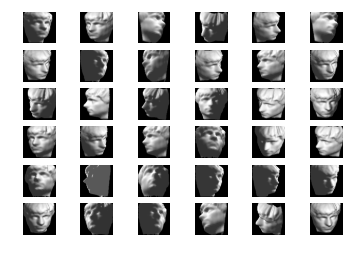

In [8]:
for i in range(1,37):
    plt.subplot(6,6,i)
    plt.axis('off')    
    plt.imshow(1-images[:,i].reshape(64,64).T, cmap=plt.cm.gray_r)

ISOMAP sur les données (ppv,nb d'axes) :

In [10]:
Y = manifold.Isomap(5, 3).fit_transform(images.T)

On retrouve les trois paramètres libres (lumière et orientations ) sur les 3 premiers axes ISOMAP :

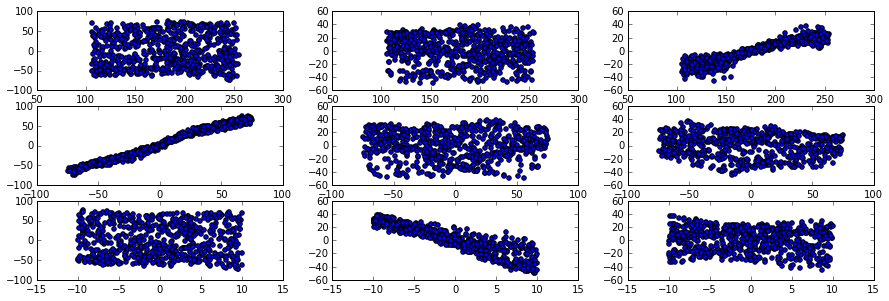

In [11]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(9,3,1)
ax.scatter(lights.T,Y[:,0])
ax = fig.add_subplot(9,3,2)
ax.scatter(lights.T,Y[:,1])
ax = fig.add_subplot(9,3,3)
ax.scatter(lights.T,Y[:,2])
ax = fig.add_subplot(9,3,4)
ax.scatter(poses[0,:],Y[:,0])
ax = fig.add_subplot(9,3,5)
ax.scatter(poses[0,:],Y[:,1])
ax = fig.add_subplot(9,3,6)
ax.scatter(poses[0,:],Y[:,2])
ax = fig.add_subplot(9,3,7)
ax.scatter(poses[1,:],Y[:,0])
ax = fig.add_subplot(9,3,8)
ax.scatter(poses[1,:],Y[:,1])
ax = fig.add_subplot(9,3,9)
ax.scatter(poses[1,:],Y[:,2])

ISOMAP retrouve les trois paramètres libres du problemes : lumiere, orientation droite gauche et orientation haut bas